# 1. Import Modules to be used

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, mean_squared_error

In [13]:
df = pd.read_csv("../data/winequality_white.csv")

# 2. Cleaning the Data

In [14]:
df.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


## i) Put into correct format

In [15]:
# Fix headers
df = pd.read_csv("../data/winequality_white.csv", header=0, sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## ii) Inspect the data

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>, <AxesSubplot:>]],
      dtype=object)

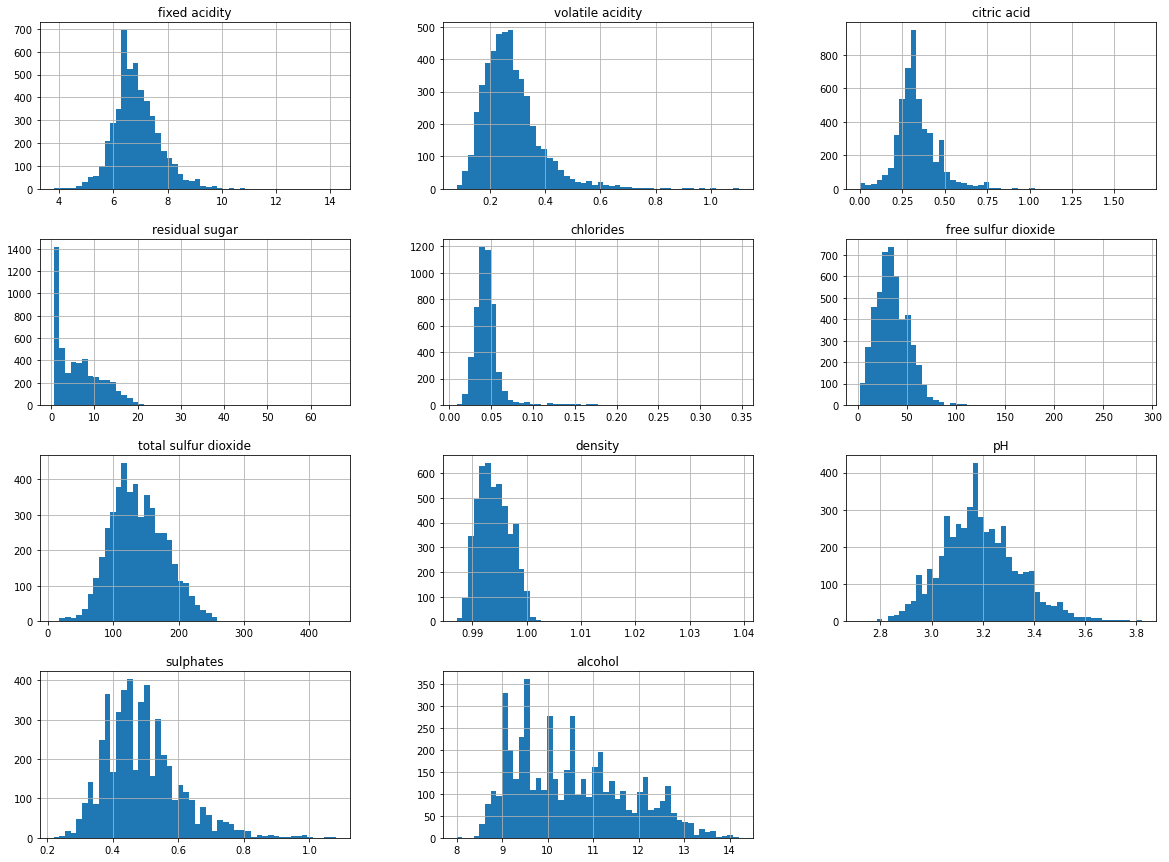

In [17]:
# From the above output we can conclude no null rows exist

# PLOT THE FEATURES
df.loc[:, df.columns!='quality'].hist(bins=50, figsize=(20,15))

Text(0.5, 1.0, 'Frequency of Wine Qualities')

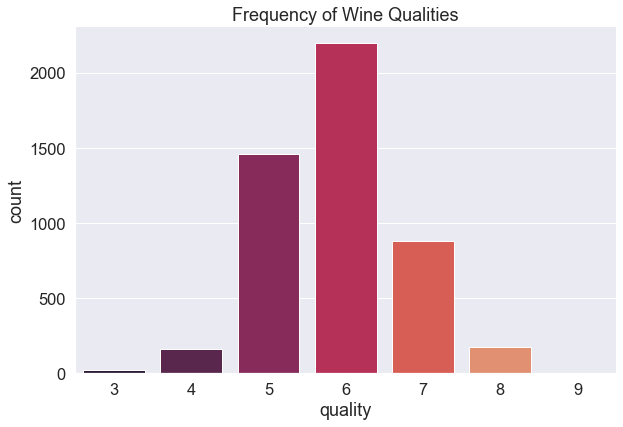

In [18]:
# PLOT THE LABEL
sns.set(font_scale=1.5)
sns.catplot(data=df, x="quality", kind="count", palette="rocket", aspect=1.5, height=6)
plt.title("Frequency of Wine Qualities")

In [19]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [20]:
# From the above 3 outputs, we can conclude no significant outliers exist. It is worth noting that there are many more 'normal' wines than 'poor' or 'excellent' wines. 
# Therefore, it must be ensured that training and test sets are proportional

# 3. Feature Selection

## i) Create Label

In [21]:
# We will use the quality value to catgeorise each wine into a class - 'excellent', 'standard', and 'poor'

df["quality_category"] = pd.cut(df["quality"], bins=[0, 5, 9], labels=["poor", "good"])

Text(0.5, 1.0, 'Wine Quality Freuqency by Category')

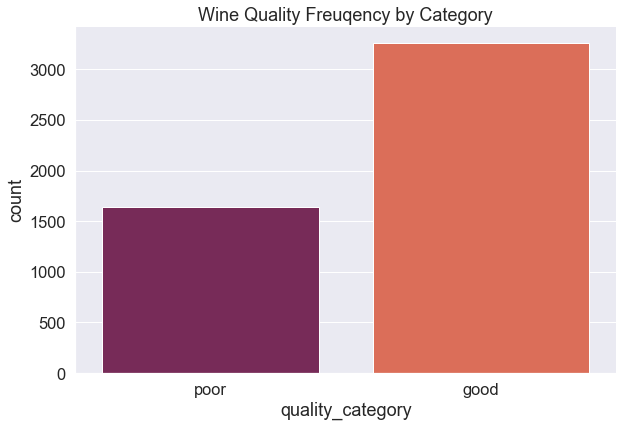

In [22]:
sns.set(font_scale=1.5)
sns.catplot(data=df, x="quality_category", kind="count", palette="rocket", aspect=1.5, height=6)
plt.title("Wine Quality Freuqency by Category")

## ii) Choose Features

In [23]:
# Get correlation matrix to assess all features' importance at once
df.corr().quality.sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

Text(0.5, 1.0, 'Alcohol percentages of Poor Vs Good Wines')

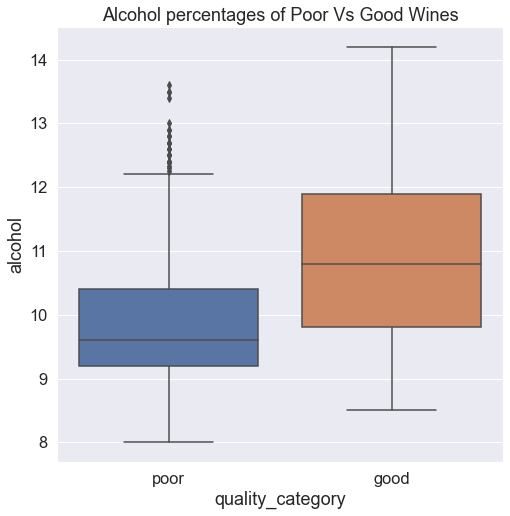

In [24]:
plt.figure(figsize=(8,8))
sns.set(font_scale=1.5)
sns.boxplot(data=df, x="quality_category", y="alcohol")
plt.title("Alcohol percentages of Poor Vs Good Wines")

Text(0.5, 1.0, 'Density of Poor Vs Good Wines')

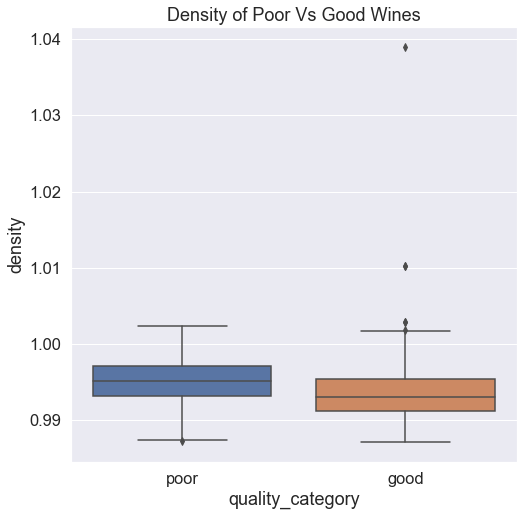

In [25]:
# From the above graph we can see better wines tend to have higher alcohol percentages, which corresponds with the ~0.4 correlation factor that 'alcohol' has with 'quality'
# Let's test it on Density, which will have a negative relationship 

plt.figure(figsize=(8,8))
sns.set(font_scale=1.5)
sns.boxplot(data=df, x="quality_category", y="density")
plt.title("Density of Poor Vs Good Wines")

In [26]:
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_category_good
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [50]:
# GET MIN AND MAX OF EACH FEATURE

for col in df_dummies.columns:
    print("%s       %s" % (df_dummies[col].min(), df_dummies[col].max()))

3.8       14.2
0.08       1.1
0.0       1.66
0.6       65.8
0.009       0.346
2.0       289.0
9.0       440.0
0.98711       1.03898
2.72       3.82
0.22       1.08
8.0       14.2
3       9
0       1


In [27]:

target = df_dummies["quality_category_good"]
features = df_dummies.drop(["quality_category_good", "quality"], axis=1)



In [28]:
features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [29]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: quality_category_good, dtype: uint8

# 4. Train/Test Sets

In [30]:
TEST_SIZE = 0.2

In [31]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2) # 8 is my lucky number

In [32]:
print("""
X_train: {} | X_test: {}
y_train: {}    | y_test: {}
""".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape)) 


X_train: (3918, 11) | X_test: (980, 11)
y_train: (3918,)    | y_test: (980,)



In [33]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1871,7.0,0.21,0.22,5.1,0.048,38.0,168.0,0.99450,3.34,0.49,10.4
3758,6.6,0.27,0.33,1.4,0.042,24.0,183.0,0.99215,3.29,0.46,10.7
4206,5.9,0.32,0.20,14.4,0.050,29.0,144.0,0.99666,3.24,0.41,10.3
1904,7.9,0.26,0.33,10.3,0.039,73.0,212.0,0.99690,2.93,0.49,9.5
3702,7.5,0.24,0.31,13.1,0.050,26.0,180.0,0.99884,3.05,0.53,9.1
...,...,...,...,...,...,...,...,...,...,...,...
2309,8.1,0.28,0.34,1.3,0.035,11.0,126.0,0.99232,3.14,0.50,9.8
298,7.5,0.17,0.44,11.3,0.046,65.0,146.0,0.99700,3.17,0.45,10.0
4237,7.5,0.23,0.30,1.2,0.030,27.0,80.0,0.99192,3.05,0.68,10.5
3296,6.6,0.28,0.42,8.2,0.044,60.0,196.0,0.99562,3.14,0.48,9.4


In [34]:
y_train

1871    1
3758    0
4206    1
1904    1
3702    1
       ..
2309    1
298     1
4237    0
3296    0
1977    1
Name: quality_category_good, Length: 3918, dtype: uint8

Normalize the Data

In [35]:
normalise = MinMaxScaler()
fit = normalise.fit(X_train)
X_train = fit.transform(X_train)
X_test = fit.transform(X_test)

X_train


array([[0.30769231, 0.12745098, 0.17886179, ..., 0.56363636, 0.30588235,
        0.38709677],
       [0.26923077, 0.18627451, 0.26829268, ..., 0.51818182, 0.27058824,
        0.43548387],
       [0.20192308, 0.23529412, 0.16260163, ..., 0.47272727, 0.21176471,
        0.37096774],
       ...,
       [0.35576923, 0.14705882, 0.24390244, ..., 0.3       , 0.52941176,
        0.40322581],
       [0.26923077, 0.19607843, 0.34146341, ..., 0.38181818, 0.29411765,
        0.22580645],
       [0.44230769, 0.11764706, 0.2195122 , ..., 0.48181818, 0.31764706,
        0.17741935]])

In [36]:
X_test[0]

array([0.26923077, 0.19607843, 0.24390244, 0.18865031, 0.07121662,
       0.20069204, 0.46993007, 0.14806246, 0.36363636, 0.18823529,
       0.51612903])

# 5. Training the Model

In [37]:
model = RandomForestClassifier(random_state=8)

In [38]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.823469387755102

In [39]:
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.65      0.72       345
           1       0.83      0.92      0.87       635

    accuracy                           0.82       980
   macro avg       0.82      0.78      0.80       980
weighted avg       0.82      0.82      0.82       980



In [40]:
model_rmse = np.sqrt(mean_squared_error(y_test, pred))
model_rmse


0.4201554619957927

In [41]:
comparison = pd.DataFrame(data= {"True_Value": y_test, "Pred": pred})
comparison

,True_Value,Pred
4607,1,1
2855,1,1
1309,1,0
3984,1,1
1152,0,0
...,...,...
4303,1,1
4274,1,1
1129,1,1
4683,1,1


In [44]:
def predict_outcome(model, fit, test):
    test = fit.transform(test)
    pred = model.predict(test)
    return int(pred[0])

In [45]:
print(predict_outcome(model, fit, [[7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8]]))

1
